In [42]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sb

In [43]:
sb.set(style="white", context="notebook", palette="deep")

COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]

sb.set_palette(palette=COLOR_COLUMNS, n_colors=4)


In [44]:
df = pd.read_csv('AppleStore.csv')
df

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1


In [45]:
df.price.mean()

1.7262178685562626

In [46]:
df = df.drop("currency", axis="columns")

In [47]:
def _byte_resizer(data):
    return np.around(data / 1000000, decimals=2)

df["size_Mb"] = df["size_bytes"].apply(_byte_resizer)
df.drop("size_bytes", axis="columns", inplace=True)

In [48]:
df.describe(include="O")

,track_name,ver,cont_rating,prime_genre
count,7197,7197,7197,7197
unique,7195,1590,4,23
top,Mannequin Challenge,1.0,4+,Games
freq,2,317,4433,3862


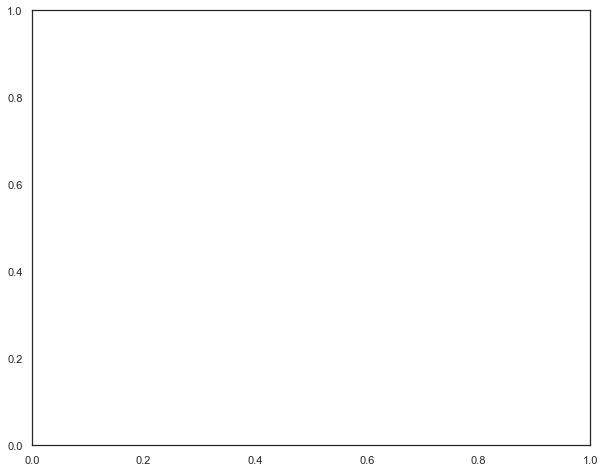

In [49]:
plt.subplots(figsize=(10, 8))
BINS = [0.00, 10.00, 20.00, 50.00, 100.00, 200.00, 500.00, 1000.00, 2000.00, np.inf]
LABELS = ["<10m", "10-20m", "20-50m", "50-100m", "100-200m", "200-500m", "500-1000m", "1-2G", ">2G"]

<AxesSubplot:>

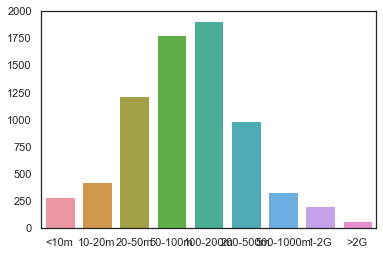

In [50]:
freqs = pd.cut(df["size_Mb"], BINS, include_lowest=True, labels=LABELS)
sb.barplot(y=freqs.value_counts().values, x=freqs.value_counts().index)

In [51]:
BINS = [-np.inf, 0.00, np.inf]
LABELS = ["FREE", "PAID"]
colors = ['lightcoral', 'yellowgreen']

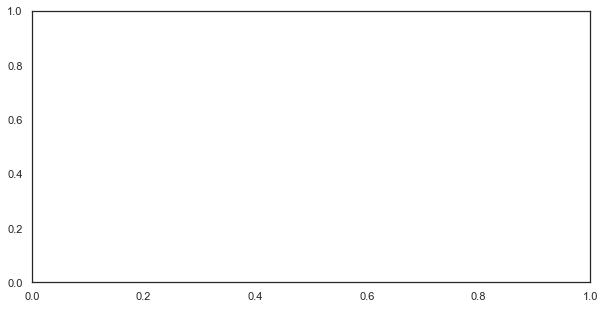

In [52]:
df["price_categories"] = pd.cut(df["price"], BINS, include_lowest=True, labels=LABELS)
fig, axs = plt.subplots(figsize=(10, 5))

In [53]:
price_df = df["price_categories"].value_counts()


(-1.1057396083108322,
 1.1002733599434824,
 -1.1276675874208923,
 1.1112839653444184)

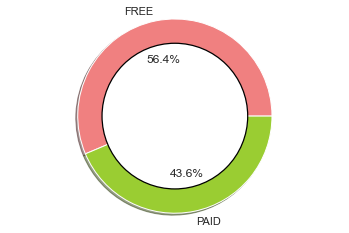

In [54]:
plt.pie(price_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

In [55]:
free_apps = df.loc[df["price_categories"] == "FREE"]
paid_apps = df.loc[df["price_categories"] == "PAID"]

In [56]:
free_apps_rated = free_apps.sort_values(by=["rating_count_tot"], ascending=False)
paid_apps_rated = paid_apps.sort_values(by=["rating_count_tot"], ascending=False)

<AxesSubplot:xlabel='rating_count_tot', ylabel='track_name'>

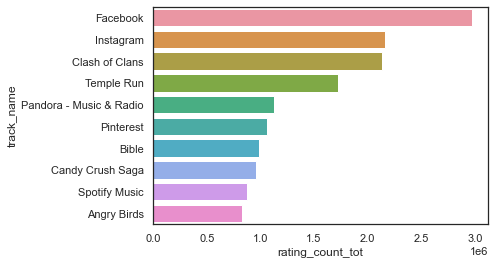

In [57]:
sb.barplot(x=free_apps_rated["rating_count_tot"][:10], y=free_apps_rated["track_name"][:10])

<AxesSubplot:xlabel='rating_count_tot', ylabel='track_name'>

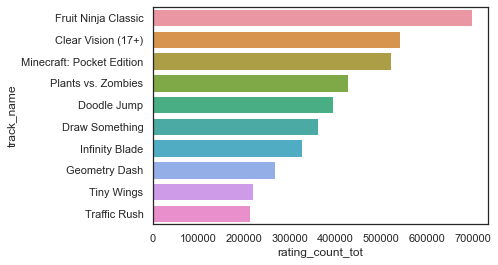

In [58]:
sb.barplot(x=paid_apps_rated["rating_count_tot"][:10], y=paid_apps_rated["track_name"][:10])


In [60]:
ratings = df.sort_values(by=["rating_count_tot"], ascending=False)


<AxesSubplot:xlabel='rating_count_tot', ylabel='track_name'>

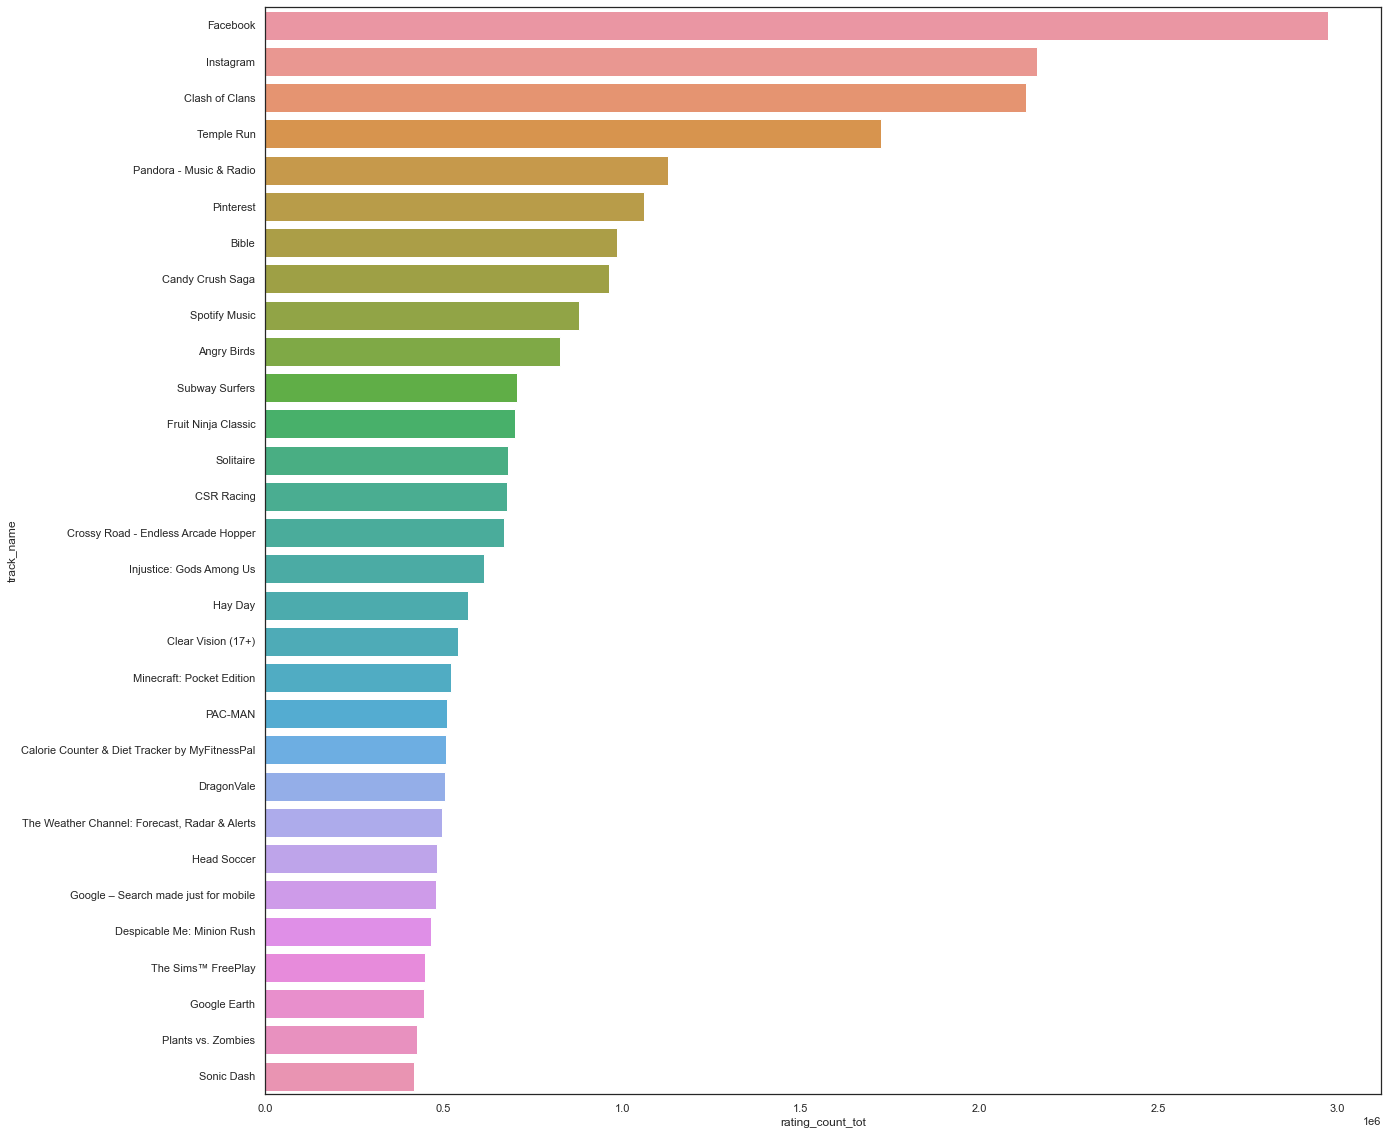

In [61]:
plt.subplots(figsize=(20, 20))
sb.barplot(x=ratings["rating_count_tot"][:30], y=ratings["track_name"][:30])

<AxesSubplot:>

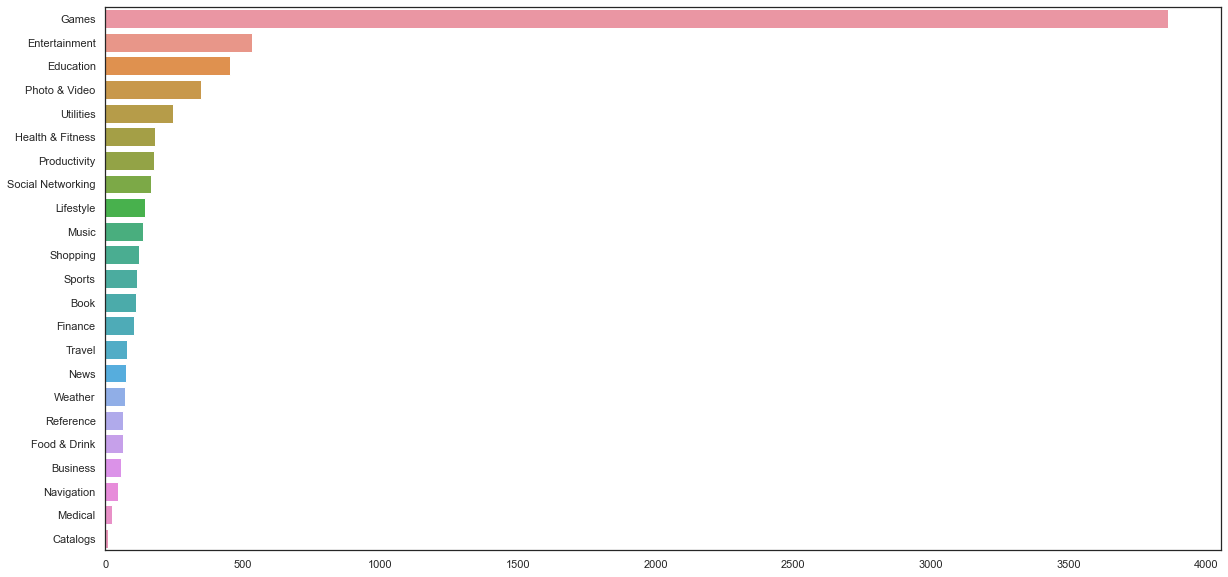

In [62]:
genres = df["prime_genre"].value_counts()
genres.sort_values(ascending=False, inplace=True)

plt.subplots(figsize=(20, 10))
sns.barplot(x=genres.values, y=genres.index, order=genres.index, orient="h")

In [63]:
games = df.loc[df["prime_genre"] == "Games"]
games.head()

,Unnamed: 0,id,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_Mb,price_categories
0,1,281656475,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,100.79,PAID
5,6,283619399,Shanghai Mahjong,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,10.49,PAID
9,10,284736660,Ms. PAC-MAN,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,70.02,PAID
10,11,284791396,Solitaire by MobilityWare,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1,49.62,PAID
11,12,284815117,SCRABBLE Premium,7.99,105776,166,3.5,2.5,5.19.0,4+,Games,37,0,6,1,227.55,PAID


[Text(0.5, 0, 'USD'), Text(0, 0.5, 'percent (%)')]

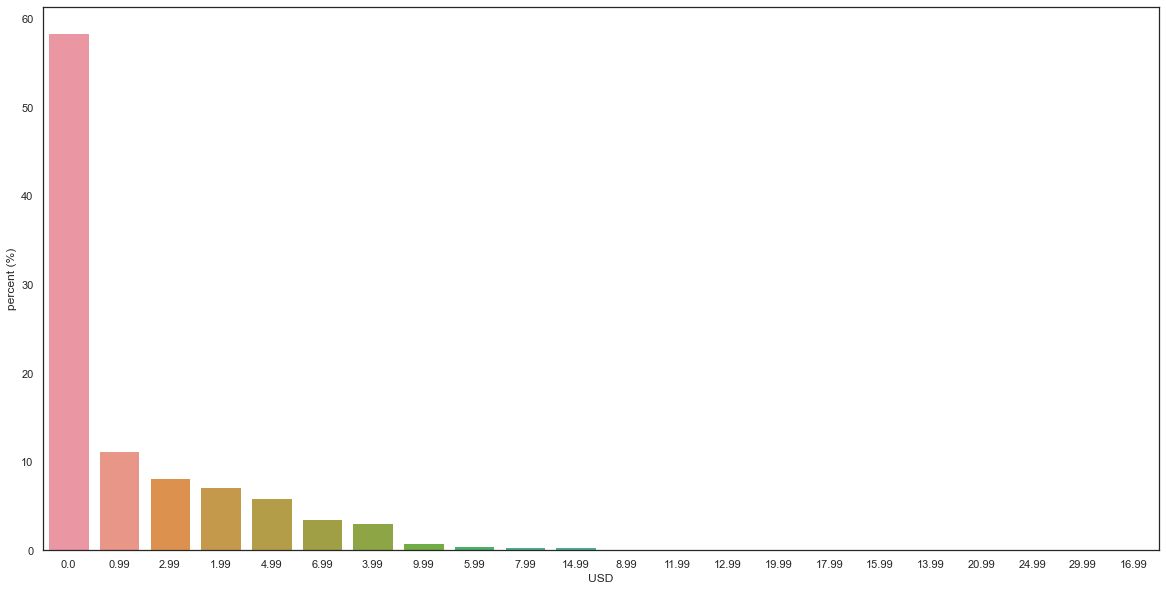

In [65]:
prices = (games["price"].value_counts()) / (games["price"].shape[0]) * 100
prices.sort_values(ascending=False, inplace=True)
plt.subplots(figsize=(20, 10))
ax = sns.barplot(y=prices.values, x=prices.index, order=prices.index)
ax.set(xlabel="USD", ylabel="percent (%)")

In [66]:
free_games = games.loc[games["price_categories"] == "FREE"]
paid_games = games.loc[games["price_categories"] == "PAID"]

free_games_rated = free_games.sort_values(by=["rating_count_tot"], ascending=False)
paid_games_rated = paid_games.sort_values(by=["rating_count_tot"], ascending=False)

<AxesSubplot:xlabel='rating_count_tot', ylabel='track_name'>

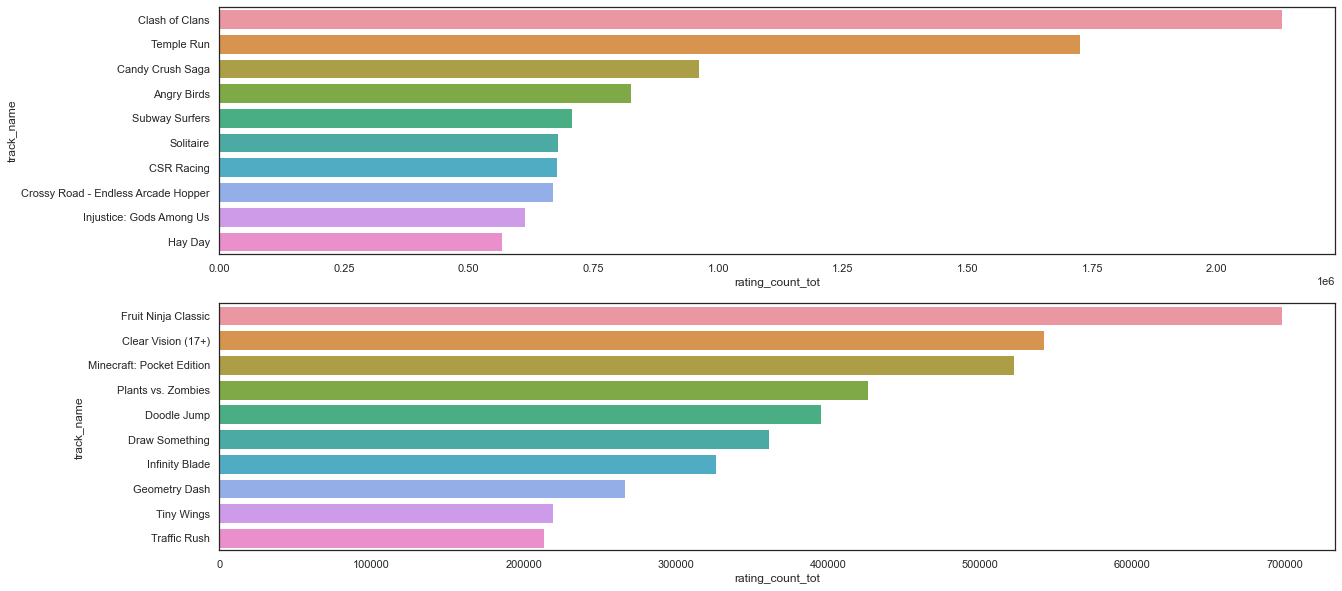

In [72]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sns.barplot(x=free_games_rated["rating_count_tot"][:10], y=free_games_rated["track_name"][:10], ax=ax1)
sns.barplot(x=paid_games_rated["rating_count_tot"][:10], y=paid_games_rated["track_name"][:10], ax=ax2)

<AxesSubplot:xlabel='rating_count_ver', ylabel='track_name'>

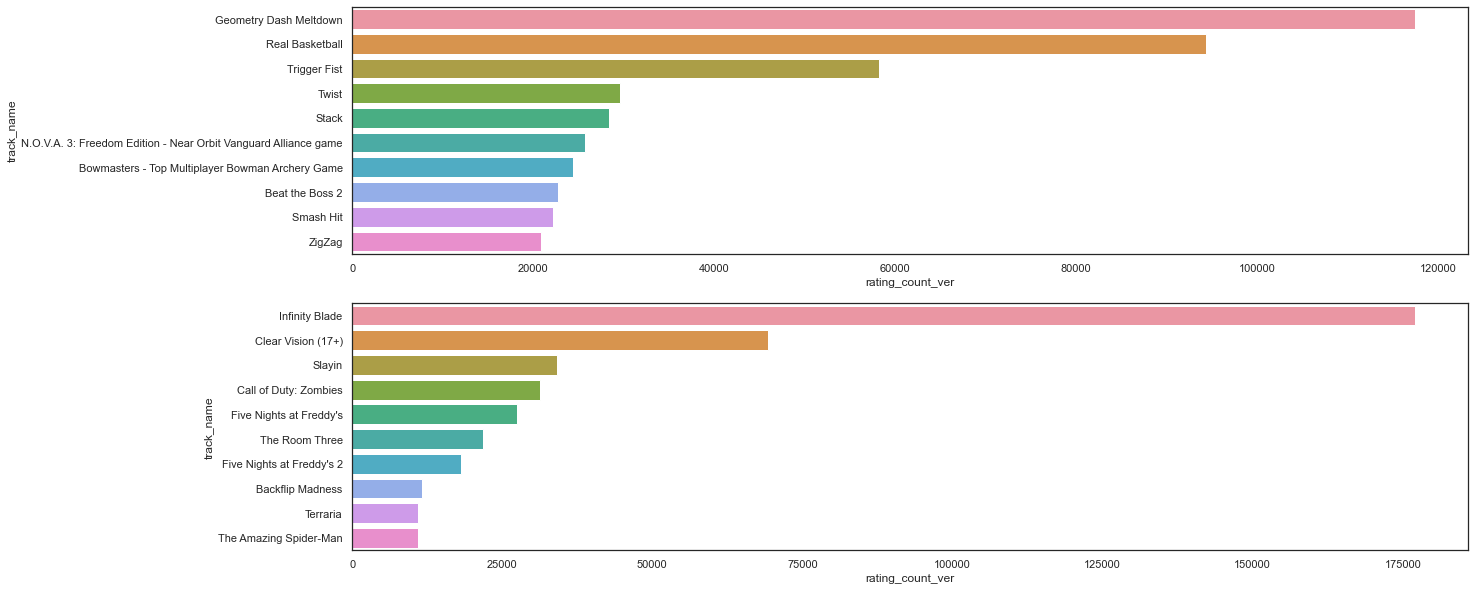

In [74]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
free_games_rated_curr = free_games.sort_values(by=["rating_count_ver"], ascending=False)
paid_games_rated_curr = paid_games.sort_values(by=["rating_count_ver"], ascending=False)
sns.barplot(x=free_games_rated_curr["rating_count_ver"][:10], y=free_games_rated_curr["track_name"][:10], ax=ax1)
sns.barplot(x=paid_games_rated_curr["rating_count_ver"][:10], y=paid_games_rated_curr["track_name"][:10], ax=ax2)